In [0]:
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


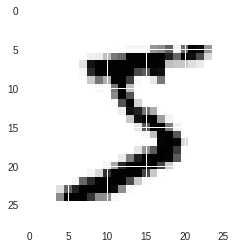

In [41]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [42]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
y_train[:10]
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [115]:
from keras.layers import Activation
from keras.layers.core import Dense
from keras import backend as K
K.set_image_dim_ordering('tf')
model = Sequential()
 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Convolution2D(10, 3, activation='relu'))
model.add(Convolution2D(10, 3, activation='relu'))
model.add(Convolution2D(10,22))

model.add(Flatten())
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_243 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_244 (Conv2D)          (None, 26, 26, 10)        330       
_________________________________________________________________
dense_36 (Dense)             (None, 26, 26, 8)         88        
_________________________________________________________________
conv2d_245 (Conv2D)          (None, 24, 24, 10)        730       
_________________________________________________________________
conv2d_246 (Conv2D)          (None, 22, 22, 10)        910       
_________________________________________________________________
conv2d_247 (Conv2D)          (None, 1, 1, 10)          48410     
_________________________________________________________________
flatten_39 (Flatten)         (None, 10)                0         
__________

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  import sys


In [117]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 32s 529us/step - loss: 0.0093 - acc: 0.9969
Epoch 2/10
30240/60000 [==============>...............] - ETA: 15s - loss: 0.0068 - acc: 0.997560000/60000 [==============================] - 31s 509us/step - loss: 0.0076 - acc: 0.9973
Epoch 3/10
48576/60000 [=======================>......] - ETA: 5s - loss: 0.0063 - acc: 0.997760000/60000 [==============================] - 30s 508us/step - loss: 0.0066 - acc: 0.9977
Epoch 4/10
57728/60000 [===========================>..] - ETA: 1s - loss: 0.0072 - acc: 0.997660000/60000 [==============================] - 30s 504us/step - loss: 0.0070 - acc: 0.9976
Epoch 5/10
60000/60000 [==============================] - 30s 507us/step - loss: 0.0056 - acc: 0.9983
Epoch 6/10
  832/60000 [..............................] - ETA: 30s - loss: 6.8128e-04 - acc: 1.000060000/60000 [==============================] - 30s 503us/step - loss: 0.0070 - acc: 0.9977
Epoch 7/10
36352/60000 [=================>........

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [119]:
print(score)

[0.08605235737733757, 0.9856]
